In [2]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Creare DF complet

In [3]:

train_path = "../../datasets/Combined_Corpus/Train"
test_path = "../../datasets/Combined_Corpus/Test"

train_files = glob.glob(os.path.join(train_path, "*reparat*.csv"))  
test_files = glob.glob(os.path.join(test_path, "*.csv"))           

df_train = pd.concat([pd.read_csv(f) for f in train_files], ignore_index=True)
df_test = pd.concat([pd.read_csv(f) for f in test_files], ignore_index=True)

df_all = pd.concat([df_train, df_test], ignore_index=True)

print("Dimensiuni df_train:", df_train.shape)
print("Dimensiuni df_test:", df_test.shape)
print("Dimensiuni df_all:", df_all.shape)


Dimensiuni df_train: (79520, 2)
Dimensiuni df_test: (7011, 2)
Dimensiuni df_all: (86531, 2)


In [4]:
print("Numarul de valori lipsa in df_all:", df_all.isnull().sum())

Numarul de valori lipsa in df_all: Statement    0
Label        0
dtype: int64


In [5]:
df_all['Statement'] = df_all['Statement'].astype(str)

df_all['Statement_length'] = df_all['Statement'].apply(len)
df_all['word_count'] = df_all['Statement'].apply(lambda x: len(x.split()))
df_all['char_count'] = df_all['Statement'].apply(lambda x: sum(len(word) for word in x.split()))
df_all['avg_word_length'] = df_all['char_count'] / df_all['word_count']

print(df_all[['Statement', 'Statement_length', 'word_count', 'char_count', 'avg_word_length']].head())


                                           Statement  Statement_length  \
0  More Than 100 Million Americans Are On Welfare...              4669   
1  There is no commitment to provide players, and...              2291   
2  Does Uptick in Mysterious Booms Foretell Mega-...              8810   
3  Rand Paul Exposes the Crony Federal Reserve on...                73   
4  Andrew S. Grove, the longtime chief executive ...             12473   

   word_count  char_count  avg_word_length  
0         833        3836         4.605042  
1         387        1904         4.919897  
2        1450        7360         5.075862  
3          12          61         5.083333  
4        1980       10494         5.300000  


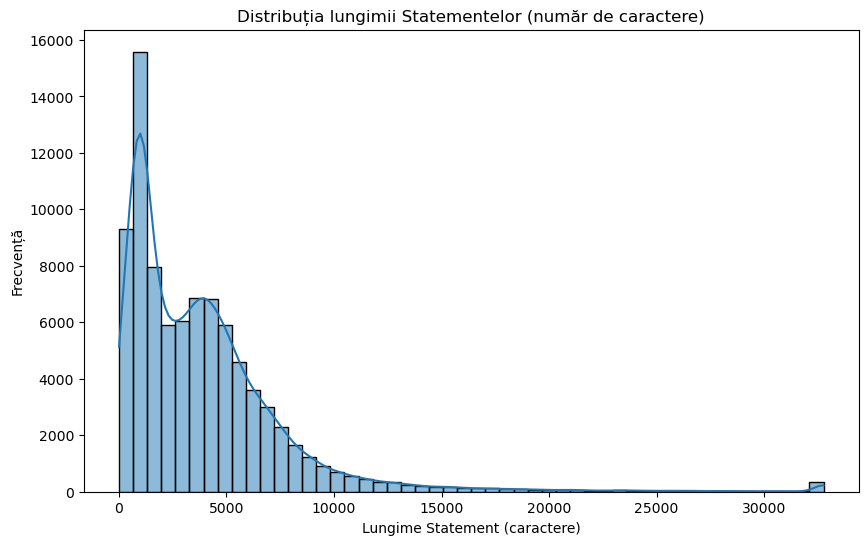

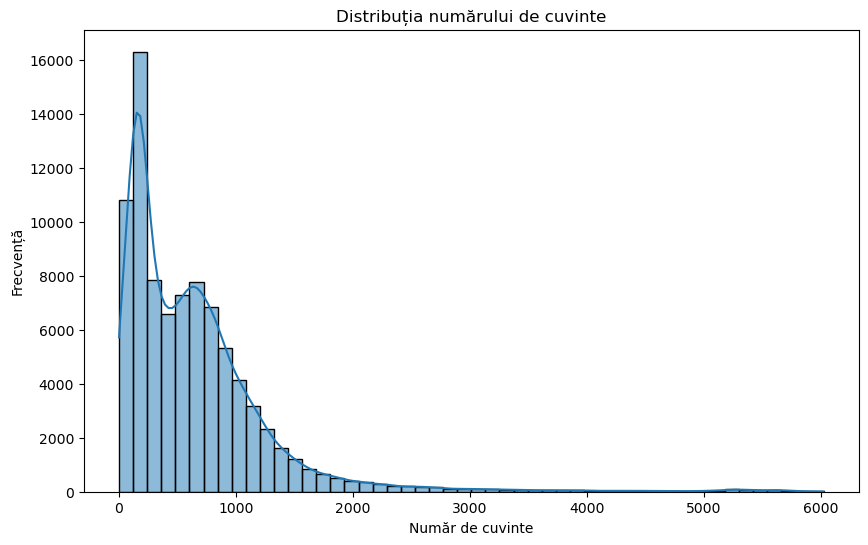

In [ ]:


plt.figure(figsize=(10, 6))
sns.histplot(df_all['Statement_length'], bins=50, kde=True)
plt.title('Distributia lungimii Statementelor (numar de caractere)')
plt.xlabel('Lungime Statement (caractere)')
plt.ylabel('Frecvență')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df_all['word_count'], bins=50, kde=True)
plt.title('Distributia numarului de cuvinte')
plt.xlabel('Numar de cuvinte')
plt.ylabel('Frecventa')
plt.show()


In [14]:
df_all

,Statement,Label,Statement_length,word_count,char_count,avg_word_length
0,More Than 100 Million Americans Are On Welfare...,0,4669,833,3836,4.605042
1,"There is no commitment to provide players, and...",1,2291,387,1904,4.919897
2,Does Uptick in Mysterious Booms Foretell Mega-...,0,8810,1450,7360,5.075862
3,Rand Paul Exposes the Crony Federal Reserve on...,0,73,12,61,5.083333
4,"Andrew S. Grove, the longtime chief executive ...",1,12473,1980,10494,5.300000
...,...,...,...,...,...,...
86526,Times reporters provided analysis and fact c...,1,10804,1808,8948,4.949115
86527,How did American intelligence officials come ...,1,4705,780,3897,4.996154
86528,WASHINGTON â€” The chiefs of Americaâ€™s in...,1,7898,1262,6612,5.239303
86529,Donald J. Trump said Wednesday that he would...,1,9199,1521,7650,5.029586


In [6]:
df_all.to_csv("../../datasets/Combined_Corpus/All.csv", index=False)

In [ ]:
numar = df_all[df_all['word_count'] < 120].shape[0]
print("Numarul de randuri cu word_count mai mic de 100:", numar)


NameError: name 'df_all' is not defined

# Continuare cu DF complet

In [2]:
df = pd.read_csv("../../datasets/Combined_Corpus/All.csv")

In [4]:
df.sample(10)

,Statement,Label,Statement_length,word_count,char_count,avg_word_length
19078,Six million working families on low incomes ar...,1,4266,697,3560,5.107604
7449,Increasingly powerful antipsychotic drugs avai...,1,5958,959,4999,5.212722
80827,President Obama has had two sleepless nights s...,0,898,154,744,4.831169
50055,Saying that the company could cash in big time...,0,1253,204,1049,5.142157
27,Lynne and Dick Cheney Publicly Called Out for ...,0,75,12,63,5.250000
48007,When my carâ€™s battery died on a bitterly col...,1,8392,1467,6926,4.721200
51574,"â€œI wouldnâ€™t do a session with you,â€ a co...",1,5502,975,4507,4.622564
41859,"â€¢ In the June referendum, there was a 51.9% ...",1,1215,216,1000,4.629630
32636,Newly acquired Eagles quarterback Michael Vick...,0,841,148,693,4.682432
49652,2.18pm BST Related: Arsenalâ€™s Alex Oxl...,1,16081,2636,12949,4.912367


In [20]:
df['Statement'][81102]


' in any sense'

In [ ]:
numar = df[df['word_count'] < 130].shape[0]
print("Numarul de randuri cu word_count mai mic de 100:", numar)


Numărul de rânduri cu word_count mai mic de 100: 11985


In [4]:
print(df["Statement"].isnull().sum())

0
